In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from reliabilipy import reliability_analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer import ConfirmatoryFactorAnalyzer
from factor_analyzer import ModelSpecificationParser
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

import warnings
warnings.filterwarnings("ignore")

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# ANÁLISIS EASI

In [2]:
easi_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-exp.xlsx')
easi_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/EASI-con.xlsx')
X_exp = StandardScaler().fit_transform(easi_exp)
X_con = StandardScaler().fit_transform(easi_con)

## ANÁLISIS FACTORIAL EXPLORATORIO

<Axes: xlabel='Factores', ylabel='EigenValues'>

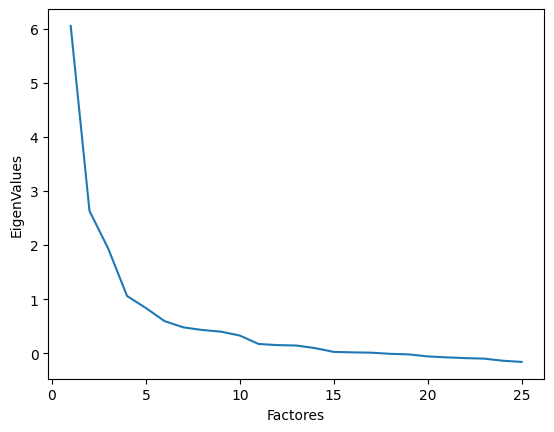

In [3]:
fa = FactorAnalyzer(10, rotation = None)
fa.fit(X_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'minres',
               n_factors = 3,
               rotation = None,
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, X_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores, 'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

## ANÁLISIS FACTORIAL CONFIRMATORIO
### BARTLETT

In [4]:
chi_square_value,p_value = calculate_bartlett_sphericity(X_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.83e+03
p = 1.48e-217


### KMO

In [5]:
kmo_all,kmo_model=calculate_kmo(X_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.855


In [6]:
factores = ['CS', 'RE', 'REM', 'SE', 'PF']
model_dict = {'CS':['easi1', 'easi6', 'easi11', 'easi16', 'easi21'],
              'RE':['easi2', 'easi7', 'easi12', 'easi17', 'easi22'],
              'REM':['easi3', 'easi8', 'easi13', 'easi18', 'easi23'],
              'SE':['easi4', 'easi9', 'easi14', 'easi19', 'easi24'],
              'PF':['easi5', 'easi10', 'easi15', 'easi20', 'easi25']}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(easi_con,
                                                                          model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec,
                                 disp = False)
cfa.fit(easi_con.values)

loadings = pd.DataFrame(cfa.loadings_,
                        columns = factores,
                        index = sum(model_dict.values(), []))
loadings = loadings.replace(0, '', regex = True)
loadings

,CS,RE,REM,SE,PF
easi1,0.415377,,,,
easi6,0.49712,,,,
easi11,0.676151,,,,
easi16,0.546905,,,,
easi21,0.77454,,,,
easi2,,0.599767,,,
easi7,,0.685118,,,
easi12,,0.009571,,,
easi17,,0.612999,,,
easi22,,0.799804,,,


### CORRELACIONES ENTRE FACTORES

In [7]:
corr = cfa.factor_varcovs_
corr = pd.DataFrame(data = corr,
                    columns = factores,
                    index = factores)
corr

,CS,RE,REM,SE,PF
CS,1.000000,0.697010,0.487692,0.531608,0.644999
RE,0.697010,1.000000,0.651017,0.476661,0.500637
REM,0.487692,0.651017,1.000000,0.622208,0.517289
SE,0.531608,0.476661,0.622208,1.000000,0.450603
PF,0.644999,0.500637,0.517289,0.450603,1.000000


<Axes: >

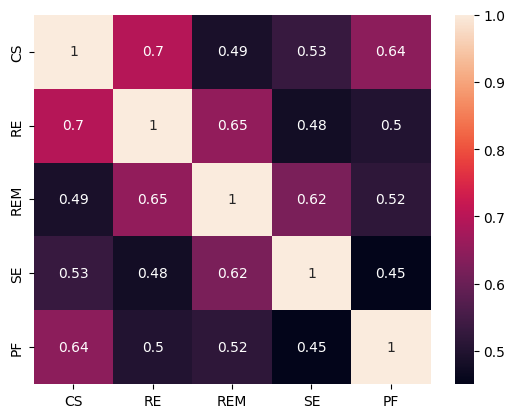

In [8]:
sns.heatmap(data = corr,
            annot = True)

### CONFIABILIDAD

In [9]:
ra = reliability_analysis(raw_dataset = easi_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.895
Alfa de Cronbach total = 0.874


In [10]:
CS = easi_con[model_dict['CS']]
RE = easi_con[model_dict['RE']]
REM = easi_con[model_dict['REM']]
SE = easi_con[model_dict['SE']]
PF = easi_con[model_dict['PF']]


factores = [CS, RE, REM, SE, PF]

for factor in factores:
    ra = reliability_analysis(raw_dataset = factor,
                          is_corr_matrix = False,
                          impute = 'median')
    ra.fit()
    print('Omega de', get_df_name(factor), '=', f'{ra.omega_total:.3}')
    print('Alfa de Cronbach de', get_df_name(factor), '=' , f'{ra.alpha_cronbach:.3}')

Omega de CS = 0.832
Alfa de Cronbach de CS = 0.825
Omega de RE = 0.678
Alfa de Cronbach de RE = 0.66
Omega de REM = 0.771
Alfa de Cronbach de REM = 0.727
Omega de SE = 0.834
Alfa de Cronbach de SE = 0.821
Omega de PF = 0.718
Alfa de Cronbach de PF = 0.693


# ANÁLISIS ESNOV

In [2]:
esnov_exp = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-exp.xlsx')
esnov_con = pd.read_excel('/mnt/72D08F32D08EFB9B/Users/Administrador/evechan/ESNOV-con.xlsx')
Z_exp = StandardScaler().fit_transform(esnov_exp)
Z_con = StandardScaler().fit_transform(esnov_con)

## ANÁLISIS FACTORIAL EXPLORATORIO

<Axes: xlabel='Factores', ylabel='EigenValues'>

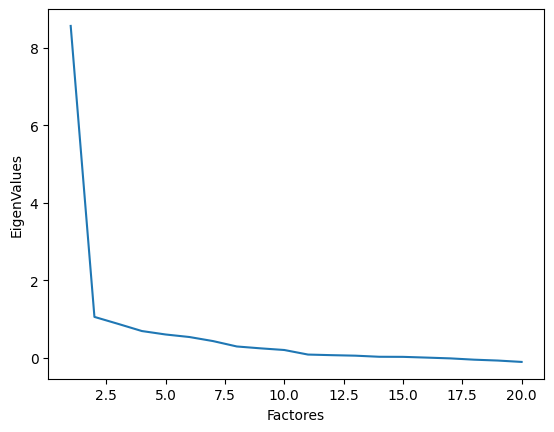

In [3]:
fa = FactorAnalyzer(10, rotation = None)
fa.fit(Z_exp)

FactorAnalyzer(bounds = (0.005, 1),
               impute = 'median',
               is_corr_matrix = False,
               method = 'minres',
               n_factors = 3,
               rotation = None,
               rotation_kwargs = {},
               use_smc = True)

factores = range(1, Z_exp.shape[1] + 1)
evs = fa.get_eigenvalues()[1]
df = pd.DataFrame({'Factores':factores, 'EigenValues':evs})

sns.lineplot(data = df,
             x = 'Factores',
             y = 'EigenValues')

## ANÁLISIS FACTORIAL CONFIRMATORIO

### BARTLETT

In [4]:
chi_square_value,p_value = calculate_bartlett_sphericity(Z_con)
print('Ji cuadrada =', f'{chi_square_value:.3}')
print('p =', f'{p_value:.3}')

Ji cuadrada = 1.88e+03
p = 5.26e-275


### KMO

In [5]:
kmo_all,kmo_model=calculate_kmo(Z_con)
print('KMO =', f'{kmo_model:.3}')

KMO = 0.943


In [6]:
factores = ['SENV', 'SSNV']
model_dict = {'SENV':['esnov1', 'esnov3', 'esnov5', 'esnov7', 'esnov9',
                      'esnov11', 'esnov13', 'esnov15', 'esnov17', 'esnov19'],
              'SSNV':['esnov2', 'esnov4', 'esnov6', 'esnov8', 'esnov10',
                      'esnov12', 'esnov14', 'esnov16', 'esnov18', 'esnov20']}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(esnov_con,
                                                                          model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec,
                                 disp = False)
cfa.fit(esnov_con.values)

loadings = pd.DataFrame(cfa.loadings_,
                        columns = factores,
                        index = sum(model_dict.values(), []))
loadings = loadings.replace(0, '', regex = True)
loadings

,SENV,SSNV
esnov1,0.928402,
esnov3,0.901012,
esnov5,0.923511,
esnov7,0.8911,
esnov9,1.05123,
esnov11,0.946145,
esnov13,0.926037,
esnov15,0.907214,
esnov17,0.929069,
esnov19,0.985403,


In [7]:
corr = cfa.factor_varcovs_
corr = pd.DataFrame(data = corr, columns = factores, index = factores)
corr

,SENV,SSNV
SENV,1.000000,0.353002
SSNV,0.353002,1.000000


### CONFIABILIDAD

In [8]:
ra = reliability_analysis(raw_dataset = esnov_con,
                          is_corr_matrix = False,
                          impute = 'median')
ra.fit()

print('Omega total =', f'{ra.omega_total:.3}')
print('Alfa de Cronbach total =', f'{ra.alpha_cronbach:.3}')

Omega total = 0.924
Alfa de Cronbach total = 0.93


In [9]:
SENV = esnov_con[model_dict['SENV']]
SSNV = esnov_con[model_dict['SSNV']]


factores = [SENV, SSNV]

for factor in factores:
    ra = reliability_analysis(raw_dataset = factor,
                          is_corr_matrix = False,
                          impute = 'median')
    ra.fit()
    print('Omega de', get_df_name(factor), '=', f'{ra.omega_total:.3}')
    print('Alfa de Cronbach de', get_df_name(factor), '=' , f'{ra.alpha_cronbach:.3}')

Omega de SENV = 0.889
Alfa de Cronbach de SENV = 0.883
Omega de SSNV = 0.872
Alfa de Cronbach de SSNV = 0.869
